Importar librerias

In [3]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


Declaración de variables

In [4]:
ages=[]
sexs=[]
bmis=[]
children=[] #numer of children
smokers=[]
regions=[]
charges=[]
    

Apertura del archivo y llenado de variables

In [5]:
with open("insurance.csv",'r') as insurance:
    dict={}
    dict=csv.DictReader(insurance)
    for person in dict:
        ages.append(person['age'])
        sexs.append(person['sex'])
        bmis.append(person['bmi'])
        children.append(person['children'])
        smokers.append(person['smoker'])
        regions.append(person['region'])
        charges.append(person['charges'])

Funcion comparacion

In [6]:
def comp(pars1,pars2=charges):
    Dict={x:{'money':0,'cuantity':0} for x in pars1}
    for par1,par2 in zip(pars1,pars2):
        Dict[par1]['money']+=float(par2)
        Dict[par1]['cuantity']+=1 
    Dict2={key:value['money']/value['cuantity'] for key,value in Dict.items()}
    return Dict2


## Quien paga mas hombres o mujeres

In [7]:


HvsM=comp(sexs,charges)
prt=abs(HvsM['male']-HvsM['female'])/HvsM['male']
print("Los hombres pagan mas por el seguro en un "+str(round(prt*100,2))+"% con una cuota promedio de "+str(round(HvsM['male'],2))+"$")


Los hombres pagan mas por el seguro en un 9.94% con una cuota promedio de 13956.75$


## Como se comporta el precio respecto a la fumar


In [8]:
SvsC=comp(smokers,charges)
prSmoker=abs(HvsM['male']-HvsM['female'])/HvsM['male']
print(prSmoker*100)


9.939077627899435


## Como se comporta el Bill respecto a la region

<BarContainer object of 4 artists>

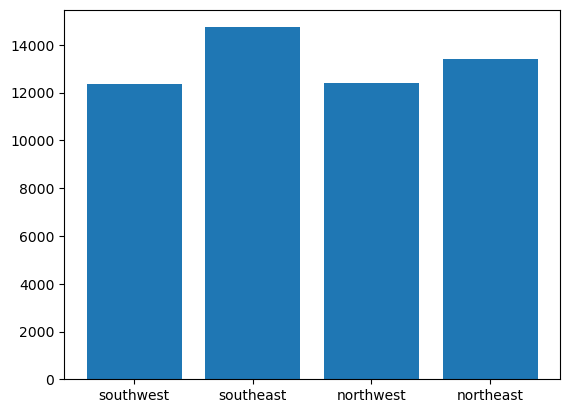

In [9]:
RvsC=comp(regions,charges)
plt.bar(RvsC.keys(),RvsC.values())

## Precio respecto a niños



<BarContainer object of 6 artists>

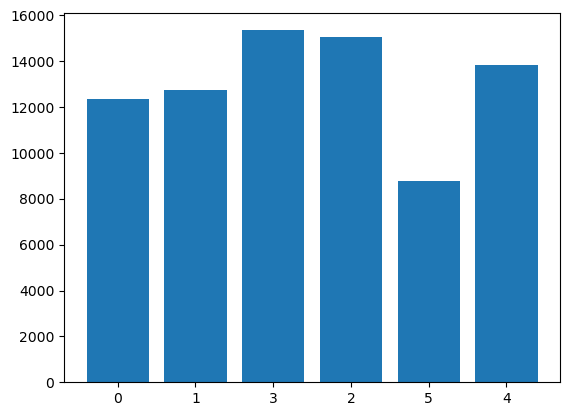

In [10]:
NvsC=comp(children,charges)
plt.bar(NvsC.keys(),NvsC.values())

As we can see, children is not a parametre since there si not a relation beetwen the number of children and the bill charge 

## BIM vs charge


10043.249
9991.03765


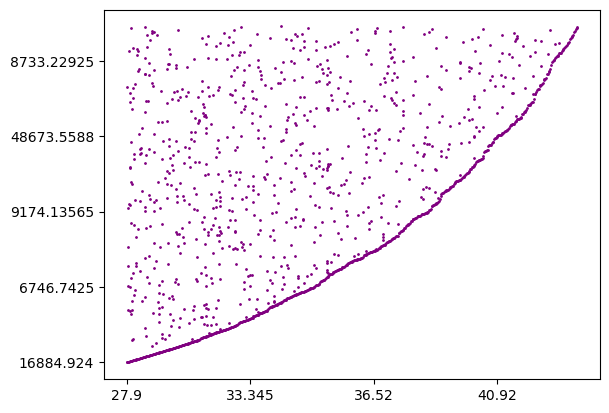

In [11]:
print(min(charges))
print(max(charges))
fig, ax = plt.subplots()
ax.scatter(bmis, charges, color='purple',s=1)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # 5 particiones en el eje X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # 7 particiones en el eje Y


Al graficar el bmi respecto al cargo es posible observar cierta dependencia exponencial, por lo que se hara un ajuste lineal para obtener una funcio del precio base respecto al bmi